In [84]:
import numpy as np
import tensorflow as tf
import tqdm
import matplotlib.pyplot as plt

In [85]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [86]:
sess =tf.compat.v1.InteractiveSession()
x = np.linspace(0,10, 1000)
y = np.sin(x) + np.random.normal(size=len(x))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


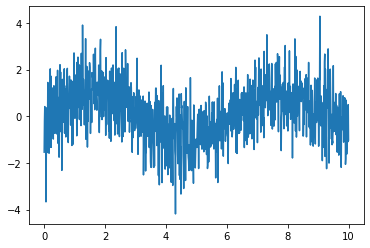

In [87]:
plt.plot(x,y)
plt.show()

In [88]:
train_idxes = np.random.choice(list(range(len(x))), 3 * len(x)//4)
test_idxes = np.array(range(len(x)))
test_idxes = np.delete(test_idxes, train_idxes)

In [89]:
X_Train = x[train_idxes]
Y_Train = y[train_idxes]
 
X_Test = x[test_idxes]
Y_Test = y[test_idxes]

In [90]:
tf.compat.v1.disable_eager_execution()

x_ = tf.compat.v1.placeholder(name="input", shape=[None, 1], dtype=tf.float32)
y_ = tf.compat.v1.placeholder(name= "output", shape=[None, 1], dtype=tf.float32)

In [91]:
model_output = tf.Variable(tf.random.normal([1]), name='bias') + tf.Variable(tf.random.normal([1]), name='k') * x_

In [92]:
loss = tf.reduce_mean(tf.pow(y_ - model_output, 2))
gd = tf.compat.v1.train.GradientDescentOptimizer(0.0001)
train_step = gd.minimize(loss)
sess.run(tf.compat.v1.global_variables_initializer())
n_epochs = 100
train_errors = []
test_errors = []

In [93]:
for i in tqdm.tqdm(range(n_epochs)):
    _, train_err = sess.run([train_step, loss ], feed_dict={x_:X_Train.reshape((len(X_Train),1)) , y_: Y_Train.reshape((len(Y_Train),1))})
    train_errors.append(train_err)
    test_errors.append(sess.run(loss, feed_dict={x_:X_Test.reshape((len(X_Test),1)) , y_: Y_Test.reshape((len(Y_Test),1))}))

100%|██████████| 100/100 [00:00<00:00, 615.60it/s]


[3.193433, 3.1727645, 3.1523814, 3.1322799, 3.1124558, 3.0929055, 3.073625, 3.0546107, 3.0358593, 3.0173666]
[2.7236385, 2.7057488, 2.688119, 2.670745, 2.6536236, 2.6367512, 2.6201236, 2.603738, 2.587591, 2.5716786]


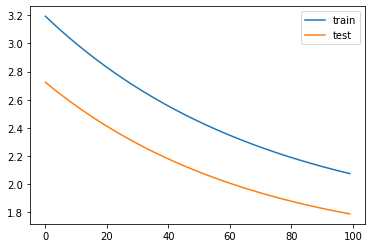

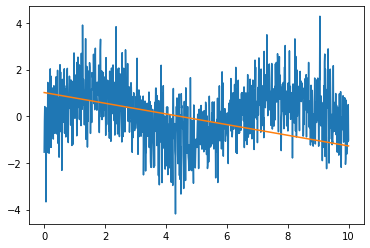

In [94]:
plt.plot(list(range(n_epochs)), train_errors, label = 'train' )
plt.plot(list(range(n_epochs)), test_errors, label='test') 
plt.legend()
plt.savefig('lin_reg.png')
print(train_errors[:10])
print(test_errors[:10])
plt.show()
plt.plot(x, y)
plt.plot(x,sess.run(model_output, feed_dict={x_:x.reshape((len(x),1))}))
plt.savefig("lr_forward_pass.png")